In [1]:
import duckdb
import seaborn
import matplotlib
import pygwalker
from load import DATABASE_PATH

seaborn.set_style("darkgrid")

## List all database tables

In [2]:
with duckdb.connect(str(DATABASE_PATH)) as connection:
    connection.sql("SHOW ALL TABLES").show()

┌──────────┬─────────┬──────────────────────┬──────────────────────┬───────────────────────────────────────┬───────────┐
│ database │ schema  │         name         │     column_names     │             column_types              │ temporary │
│ varchar  │ varchar │       varchar        │      varchar[]       │               varchar[]               │  boolean  │
├──────────┼─────────┼──────────────────────┼──────────────────────┼───────────────────────────────────────┼───────────┤
│ stage_1  │ main    │ airbnb_nyc_detaile…  │ [id, listing_url, …  │ [BIGINT, VARCHAR, BIGINT, DATE, VAR…  │ false     │
│ stage_1  │ main    │ airbnb_nyc_listings  │ [id, name, host_id…  │ [BIGINT, VARCHAR, BIGINT, VARCHAR, …  │ false     │
│ stage_1  │ main    │ pluto                │ [borough, block, l…  │ [VARCHAR, BIGINT, BIGINT, BIGINT, D…  │ false     │
│ stage_1  │ main    │ tlc_trips            │ [VendorID, tpep_pi…  │ [INTEGER, TIMESTAMP, TIMESTAMP, BIG…  │ false     │
└──────────┴─────────┴──────────

In [3]:
with duckdb.connect(str(DATABASE_PATH)) as connection:
    table_details = connection.sql("SHOW ALL TABLES").df()
table_details

,database,schema,name,column_names,column_types,temporary
0,stage_1,main,airbnb_nyc_detailed_listings,"[id, listing_url, scrape_id, last_scraped, sou...","[BIGINT, VARCHAR, BIGINT, DATE, VARCHAR, VARCH...",False
1,stage_1,main,airbnb_nyc_listings,"[id, name, host_id, host_name, neighbourhood_g...","[BIGINT, VARCHAR, BIGINT, VARCHAR, VARCHAR, VA...",False
2,stage_1,main,pluto,"[borough, block, lot, community board, census ...","[VARCHAR, BIGINT, BIGINT, BIGINT, DOUBLE, BIGI...",False
3,stage_1,main,tlc_trips,"[VendorID, tpep_pickup_datetime, tpep_dropoff_...","[INTEGER, TIMESTAMP, TIMESTAMP, BIGINT, DOUBLE...",False


## Explore PLUTO

In [4]:
with duckdb.connect(str(DATABASE_PATH)) as connection:
    pluto_description = connection.sql("DESCRIBE pluto").df()
pluto_description

,column_name,column_type,null,key,default,extra
0,borough,VARCHAR,YES,None,None,None
1,block,BIGINT,YES,None,None,None
2,lot,BIGINT,YES,None,None,None
3,community board,BIGINT,YES,None,None,None
4,census tract 2010,DOUBLE,YES,None,None,None
...,...,...,...,...,...,...
96,geom,VARCHAR,YES,None,None,None
97,dcpedited,BOOLEAN,YES,None,None,None
98,notes,VARCHAR,YES,None,None,None
99,bct2020,BIGINT,YES,None,None,None


Database queries are fast

In [5]:
with duckdb.connect(str(DATABASE_PATH)) as connection:
    connection.sql("SELECT * FROM pluto").show()

┌─────────┬───────┬───────┬─────────────────┬───┬─────────┬───────────┬─────────┬─────────┬─────────────┐
│ borough │ block │  lot  │ community board │ … │  geom   │ dcpedited │  notes  │ bct2020 │  bctcb2020  │
│ varchar │ int64 │ int64 │      int64      │   │ varchar │  boolean  │ varchar │  int64  │    int64    │
├─────────┼───────┼───────┼─────────────────┼───┼─────────┼───────────┼─────────┼─────────┼─────────────┤
│ SI      │   490 │    45 │             501 │ … │ NULL    │ NULL      │ NULL    │ 5002100 │ 50021002012 │
│ SI      │  2965 │    12 │             501 │ … │ NULL    │ NULL      │ NULL    │ 5003600 │ 50036001000 │
│ SI      │  2965 │   110 │             501 │ … │ NULL    │ NULL      │ NULL    │ 5003600 │ 50036001000 │
│ SI      │  2965 │    11 │             501 │ … │ NULL    │ NULL      │ NULL    │ 5003600 │ 50036001000 │
│ SI      │  2965 │    20 │             501 │ … │ NULL    │ NULL      │ NULL    │ 5003600 │ 50036001000 │
│ SI      │  2965 │    10 │             501 │ 

Creating a DataFrame from query results can be slow

In [6]:
with duckdb.connect(str(DATABASE_PATH)) as connection:
    pluto = connection.sql("SELECT * FROM pluto").df()
pluto

,borough,block,lot,community board,census tract 2010,cb2010,schooldist,council district,postcode,firecomp,...,landmkdate,basempdate,masdate,polidate,edesigdate,geom,dcpedited,notes,bct2020,bctcb2020
0,SI,490,45,501.0,21.0,2019.0,31.0,49.0,10304.0,L077,...,None,None,None,None,None,None,NaN,None,5002100.0,5.002100e+10
1,SI,2965,12,501.0,36.0,1000.0,31.0,49.0,10305.0,E153,...,None,None,None,None,None,None,NaN,None,5003600.0,5.003600e+10
2,SI,2965,110,501.0,36.0,1000.0,31.0,49.0,10305.0,E153,...,None,None,None,None,None,None,NaN,None,5003600.0,5.003600e+10
3,SI,2965,11,501.0,36.0,1000.0,31.0,49.0,10305.0,E153,...,None,None,None,None,None,None,NaN,None,5003600.0,5.003600e+10
4,SI,2965,20,501.0,36.0,1000.0,31.0,49.0,10305.0,E153,...,None,None,None,None,None,None,NaN,None,5003600.0,5.003600e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859007,SI,2973,11,501.0,36.0,2001.0,31.0,49.0,10305.0,E153,...,None,None,None,None,None,None,NaN,None,5003600.0,5.003600e+10
859008,SI,3417,169,502.0,70.0,4012.0,31.0,50.0,10305.0,L081,...,None,None,None,None,None,None,NaN,None,5007002.0,5.007002e+10
859009,SI,3121,81,502.0,74.0,2000.0,31.0,50.0,10305.0,E161,...,None,None,None,None,None,None,NaN,None,5007400.0,5.007400e+10
859010,SI,3348,29,502.0,70.0,1015.0,31.0,50.0,10305.0,L081,...,None,None,None,None,None,None,NaN,None,5007001.0,5.007001e+10


Selecting a subset of columns can be fast

In [7]:
with duckdb.connect(str(DATABASE_PATH)) as connection:
    pluto_some_columns = connection.sql("SELECT bbl, borough, geom FROM pluto").df()
pluto_some_columns

,bbl,borough,geom
0,5004900045,SI,None
1,5029650012,SI,None
2,5029650110,SI,None
3,5029650011,SI,None
4,5029650020,SI,None
...,...,...,...
859007,5029730011,SI,None
859008,5034170169,SI,None
859009,5031210081,SI,None
859010,5033480029,SI,None


In [8]:
pluto_some_columns.value_counts(subset=["borough"])

borough
QN         324694
BK         276678
SI         125360
BX          89603
MN          42677
Name: count, dtype: int64

## Explore Airbnb

In [9]:
with duckdb.connect(str(DATABASE_PATH)) as connection:
    connection.sql("DESCRIBE airbnb_nyc_listings").show()
    connection.sql("DESCRIBE airbnb_nyc_detailed_listings").show()

┌────────────────────────────────┬─────────────┬─────────┬─────────┬─────────┬─────────┐
│          column_name           │ column_type │  null   │   key   │ default │  extra  │
│            varchar             │   varchar   │ varchar │ varchar │ varchar │ varchar │
├────────────────────────────────┼─────────────┼─────────┼─────────┼─────────┼─────────┤
│ id                             │ BIGINT      │ YES     │ NULL    │ NULL    │ NULL    │
│ name                           │ VARCHAR     │ YES     │ NULL    │ NULL    │ NULL    │
│ host_id                        │ BIGINT      │ YES     │ NULL    │ NULL    │ NULL    │
│ host_name                      │ VARCHAR     │ YES     │ NULL    │ NULL    │ NULL    │
│ neighbourhood_group            │ VARCHAR     │ YES     │ NULL    │ NULL    │ NULL    │
│ neighbourhood                  │ VARCHAR     │ YES     │ NULL    │ NULL    │ NULL    │
│ latitude                       │ DOUBLE      │ YES     │ NULL    │ NULL    │ NULL    │
│ longitude          

In [10]:
with duckdb.connect(str(DATABASE_PATH)) as connection:
    airbnb_nyc_listings = connection.sql("SELECT * FROM airbnb_nyc_listings").df()
    airbnb_nyc_detailed_listings = connection.sql("SELECT * FROM airbnb_nyc_detailed_listings").df()

In [11]:
airbnb_nyc_listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,NaN,30,49,2022-06-21,0.28,3,300,0,None
1,5136,Spacious Family Friendly Duplex w/ Patio + Yard,7378,Rebecca,Brooklyn,Sunset Park,40.662650,-73.994540,Entire home/apt,215.0,30,4,2023-08-20,0.03,1,71,1,None
2,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.709350,-73.953420,Entire home/apt,81.0,30,193,2024-05-18,1.05,1,193,3,None
3,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kae,Manhattan,East Harlem,40.801070,-73.942550,Private room,65.0,30,1,2022-06-05,0.04,2,365,0,None
4,6990,UES Beautiful Blue Room,16800,Cyn,Manhattan,East Harlem,40.787780,-73.947590,Private room,65.0,30,247,2024-03-06,1.38,1,212,2,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37760,1192946306020922085,Private Studio in Brooklyn,137493949,Sydney,Brooklyn,Clinton Hill,40.684009,-73.967850,Entire home/apt,95.0,30,0,NaT,NaN,1,37,0,None
37761,1193005542763264121,Skyline Views from MSG Penthouse,559434422,Luis,Manhattan,Chelsea,40.751493,-73.996157,Entire home/apt,599.0,30,0,NaT,NaN,1,269,0,None
37762,1193016130087171760,Stunning designer Chelsea studio on the best b...,35491667,Nat,Manhattan,Chelsea,40.741720,-74.002750,Entire home/apt,75.0,30,0,NaT,NaN,80,242,0,None
37763,1193068036013405081,Sunny & Spacious in Queens,20380663,Anastasios,Queens,Elmhurst,40.731090,-73.878070,Entire home/apt,96.0,30,0,NaT,NaN,2,365,0,None


In [12]:
airbnb_nyc_detailed_listings

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20240705150938,2024-07-06,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/miso/Hosting-...,2845,...,4.80,4.81,4.40,None,False,3,3,0,0,0.28
1,5136,https://www.airbnb.com/rooms/5136,20240705150938,2024-07-05,city scrape,Spacious Family Friendly Duplex w/ Patio + Yard,"We welcome you to stay in our lovely 2 br, 130...",None,https://a0.muscache.com/pictures/miso/Hosting-...,7378,...,5.00,4.75,4.75,None,True,1,1,0,0,0.03
2,6848,https://www.airbnb.com/rooms/6848,20240705150938,2024-07-06,city scrape,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,None,https://a0.muscache.com/pictures/e4f031a7-f146...,15991,...,4.80,4.68,4.57,None,False,1,1,0,0,1.05
3,6872,https://www.airbnb.com/rooms/6872,20240705150938,2024-07-05,city scrape,Uptown Sanctuary w/ Private Bath (Month to Month),A charming month-to-month home away from home ...,This sweet Harlem sanctuary is a 10-20 minute ...,https://a0.muscache.com/pictures/miso/Hosting-...,16104,...,5.00,5.00,5.00,None,False,2,0,2,0,0.04
4,6990,https://www.airbnb.com/rooms/6990,20240705150938,2024-07-06,city scrape,UES Beautiful Blue Room,Beautiful peaceful healthy home,"Location: Five minutes to Central Park, Museum...",https://a0.muscache.com/pictures/be6cd5b3-9295...,16800,...,4.95,4.85,4.84,None,False,1,0,1,0,1.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37760,1192946306020922085,https://www.airbnb.com/rooms/1192946306020922085,20240705150938,2024-07-05,city scrape,Private Studio in Brooklyn,Welcome to your perfect Brooklyn retreat! Full...,None,https://a0.muscache.com/pictures/hosting/Hosti...,137493949,...,NaN,NaN,NaN,None,False,1,1,0,0,NaN
37761,1193005542763264121,https://www.airbnb.com/rooms/1193005542763264121,20240705150938,2024-07-06,city scrape,Skyline Views from MSG Penthouse,Discover the pinnacle of urban living in our e...,None,https://a0.muscache.com/pictures/miso/Hosting-...,559434422,...,NaN,NaN,NaN,None,False,1,1,0,0,NaN
37762,1193016130087171760,https://www.airbnb.com/rooms/1193016130087171760,20240705150938,2024-07-05,city scrape,Stunning designer Chelsea studio on the best b...,One of a kind studio apartment in the best Che...,One of the most central and desirable location...,https://a0.muscache.com/pictures/miso/Hosting-...,35491667,...,NaN,NaN,NaN,None,False,80,70,10,0,NaN
37763,1193068036013405081,https://www.airbnb.com/rooms/1193068036013405081,20240705150938,2024-07-05,city scrape,Sunny & Spacious in Queens,"Spacious, quiet and sunny apartment in a diver...",None,https://a0.muscache.com/pictures/hosting/Hosti...,20380663,...,NaN,NaN,NaN,None,False,2,2,0,0,NaN


In [13]:
print(f"Range of price values: {airbnb_nyc_listings["price"].min()} - {airbnb_nyc_listings["price"].max()}")

Range of price values: 8.0 - 100000.0


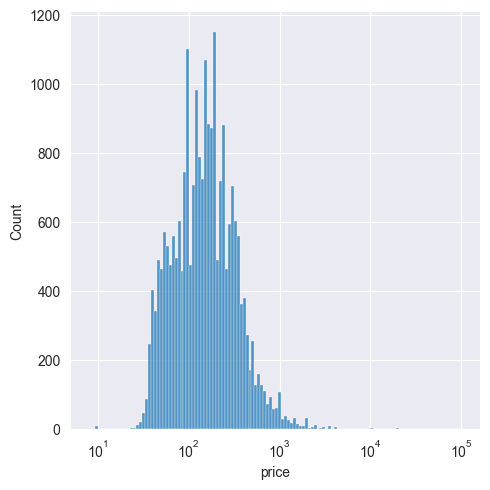

In [14]:
seaborn.displot(airbnb_nyc_listings, x="price", log_scale=True)

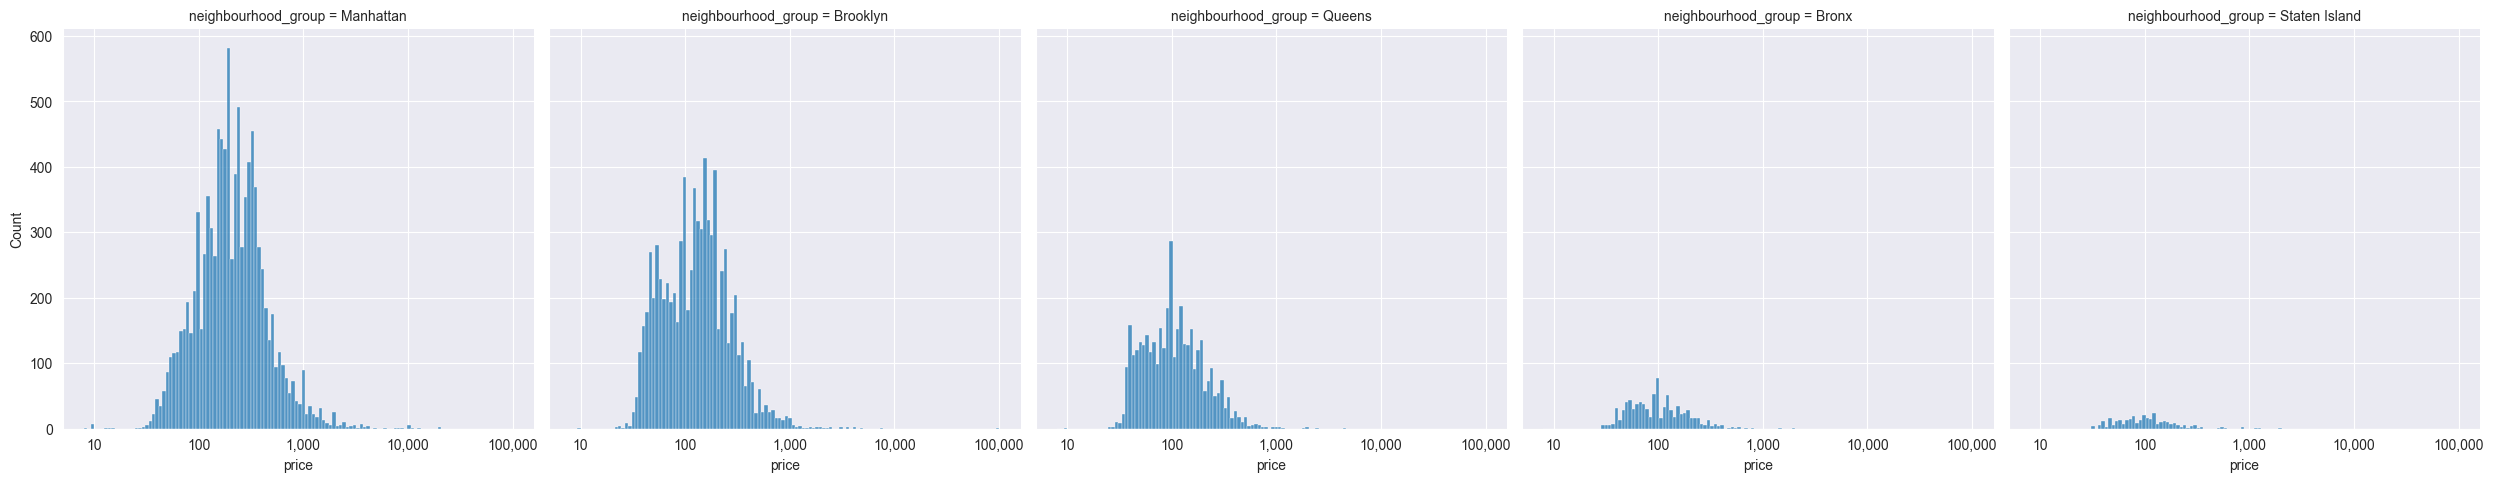

In [15]:
price_histograms = seaborn.displot(
    airbnb_nyc_listings,
    x="price",
    log_scale=True,
    col="neighbourhood_group",
)
for ax in price_histograms.axes.flatten():
    ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(
            lambda x, _: format(int(x), ",")
        )
    )
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda y, _: format(int(y), ","))
    )

`pygwalker` is an interactive way to explore data with a UI similar to Tableau

It can be used with a DataFrame or a database connection

In [16]:
conn = pygwalker.data_parsers.database_parser.Connector(
    f"duckdb:///{DATABASE_PATH}", "SELECT * FROM airbnb_nyc_listings"
)
pygwalker.walk(conn, kernel_computation=True)

Box(children=(HTML(value='\n<div id="ifr-pyg-0006200cecd43d45lek0zSfcXtMTyOpq" style="height: auto">\n    <hea…

## Explore NYC Taxi and Limousine Commission (TLC) Trip Records

In [17]:
with duckdb.connect(str(DATABASE_PATH)) as connection:
    connection.sql("DESCRIBE tlc_trips").show()
    connection.sql("SELECT COUNT(*) FROM tlc_trips").show()

┌───────────────────────────┬─────────────┬─────────┬─────────┬─────────┬─────────┐
│        column_name        │ column_type │  null   │   key   │ default │  extra  │
│          varchar          │   varchar   │ varchar │ varchar │ varchar │ varchar │
├───────────────────────────┼─────────────┼─────────┼─────────┼─────────┼─────────┤
│ VendorID                  │ INTEGER     │ YES     │ NULL    │ NULL    │ NULL    │
│ tpep_pickup_datetime      │ TIMESTAMP   │ YES     │ NULL    │ NULL    │ NULL    │
│ tpep_dropoff_datetime     │ TIMESTAMP   │ YES     │ NULL    │ NULL    │ NULL    │
│ passenger_count           │ BIGINT      │ YES     │ NULL    │ NULL    │ NULL    │
│ trip_distance             │ DOUBLE      │ YES     │ NULL    │ NULL    │ NULL    │
│ RatecodeID                │ BIGINT      │ YES     │ NULL    │ NULL    │ NULL    │
│ store_and_fwd_flag        │ VARCHAR     │ YES     │ NULL    │ NULL    │ NULL    │
│ PULocationID              │ BIGINT      │ YES     │ NULL    │ NULL    │ NU

Creating a DataFrame from this table takes several minutes (if it works at all)

A sample is useful to select a random subset of rows

In [18]:
conn = pygwalker.data_parsers.database_parser.Connector(
    f"duckdb:///{DATABASE_PATH}", "SELECT * FROM tlc_trips USING SAMPLE 5000"
)
pygwalker.walk(conn, kernel_computation=True)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Box(children=(HTML(value='\n<div id="ifr-pyg-0006200ced0dd023ThzKFCrbqyOwB4Yl" style="height: auto">\n    <hea…

Exploration can inform fast analytical queries

For example,
- How long does the average trip take?
- How long does the average trip take by vehicle type?

In [19]:
with duckdb.connect(str(DATABASE_PATH)) as connection:
    connection.sql(
        """
            SELECT
              filename,
              count(*) as number_of_trips
            FROM tlc_trips
            GROUP BY filename
            ORDER BY number_of_trips DESC
        """
    ).show()

┌─────────────────────────────────────────────────────────────────────────────────┬─────────────────┐
│                                    filename                                     │ number_of_trips │
│                                     varchar                                     │      int64      │
├─────────────────────────────────────────────────────────────────────────────────┼─────────────────┤
│ https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-01.parquet  │        19663930 │
│ https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-05.parquet │         3723833 │
│ https://d37ci6vzurychx.cloudfront.net/trip-data/fhv_tripdata_2024-01.parquet    │         1290116 │
│ https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-01.parquet  │           56551 │
└─────────────────────────────────────────────────────────────────────────────────┴─────────────────┘



Coming from different source files, different vehicle types have different columns for the same information

In [20]:
with duckdb.connect(str(DATABASE_PATH)) as connection:
    connection.sql(
        """
            ALTER TABLE tlc_trips DROP COLUMN IF EXISTS vehicle_type;
            ALTER TABLE tlc_trips ADD COLUMN IF NOT EXISTS vehicle_type VARCHAR;
            UPDATE tlc_trips
            SET vehicle_type = (
                CASE
                  WHEN filename LIKE '%yellow%' THEN 'yellow_taxi'
                  WHEN filename LIKE '%green%' THEN 'green_taxi'
                  WHEN filename LIKE '%fhv_trip%' THEN 'fhv'
                  WHEN filename LIKE '%fhvhv%' THEN 'fhvhv'
                END
            )
        """
    )

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [21]:
with duckdb.connect(str(DATABASE_PATH)) as connection:
    connection.sql(
        """
            SELECT
              vehicle_type,
              count(*) as number_of_trips
            FROM tlc_trips
            GROUP BY vehicle_type
            ORDER BY number_of_trips DESC
        """
    ).show()

┌──────────────┬─────────────────┐
│ vehicle_type │ number_of_trips │
│   varchar    │      int64      │
├──────────────┼─────────────────┤
│ fhvhv        │        19663930 │
│ yellow_taxi  │         3723833 │
│ fhv          │         1290116 │
│ green_taxi   │           56551 │
└──────────────┴─────────────────┘



In [22]:
with duckdb.connect(str(DATABASE_PATH)) as connection:
    connection.sql(
        """
            ALTER TABLE tlc_trips DROP COLUMN IF EXISTS combined_pickup_datetime;
            ALTER TABLE tlc_trips ADD COLUMN IF NOT EXISTS combined_pickup_datetime timestamp;
            UPDATE tlc_trips
            SET combined_pickup_datetime = (coalesce(lpep_pickup_datetime, tpep_pickup_datetime, Pickup_datetime))
        """
    )
    connection.sql(
        """
            ALTER TABLE tlc_trips DROP COLUMN IF EXISTS combined_dropoff_datetime;
            ALTER TABLE tlc_trips ADD COLUMN IF NOT EXISTS combined_dropoff_datetime timestamp;
            UPDATE tlc_trips
            SET combined_dropoff_datetime = (coalesce(lpep_dropoff_datetime, tpep_dropoff_datetime, DropOff_datetime))
        """
    )

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [23]:
with duckdb.connect(str(DATABASE_PATH)) as connection:
    connection.sql(
        """
            ALTER TABLE tlc_trips DROP COLUMN IF EXISTS trip_time;
            ALTER TABLE tlc_trips ADD COLUMN IF NOT EXISTS trip_time interval;
            UPDATE tlc_trips
            SET trip_time = (combined_dropoff_datetime - combined_pickup_datetime)
        """
    )

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [24]:
with duckdb.connect(str(DATABASE_PATH)) as connection:
    connection.sql(
        """
            SELECT
              combined_pickup_datetime,
              combined_dropoff_datetime,
              trip_time
            FROM tlc_trips
        """
    ).show()

┌──────────────────────────┬───────────────────────────┬───────────┐
│ combined_pickup_datetime │ combined_dropoff_datetime │ trip_time │
│        timestamp         │         timestamp         │ interval  │
├──────────────────────────┼───────────────────────────┼───────────┤
│ 2024-05-01 00:59:15      │ 2024-05-01 01:23:50       │ 00:24:35  │
│ 2024-04-30 23:58:26      │ 2024-05-01 00:29:42       │ 00:31:16  │
│ 2024-05-01 00:57:17      │ 2024-05-01 01:14:15       │ 00:16:58  │
│ 2024-05-01 00:24:47      │ 2024-05-01 00:48:51       │ 00:24:04  │
│ 2024-05-01 00:11:20      │ 2024-05-01 00:52:10       │ 00:40:50  │
│ 2024-05-01 00:54:41      │ 2024-05-01 01:14:00       │ 00:19:19  │
│ 2024-05-01 00:06:44      │ 2024-05-01 00:27:44       │ 00:21:00  │
│ 2024-05-01 00:11:37      │ 2024-05-01 00:20:05       │ 00:08:28  │
│ 2024-05-01 00:37:26      │ 2024-05-01 00:54:06       │ 00:16:40  │
│ 2024-05-01 00:05:24      │ 2024-05-01 00:29:26       │ 00:24:02  │
│          ·               │      

In [25]:
with duckdb.connect(str(DATABASE_PATH)) as connection:
    connection.sql(
        """
            SELECT
                vehicle_type,
                count(*) as number_of_trips,
                round(avg(extract('minute' FROM trip_time)), 1) as average_trip_time_mintues
            FROM tlc_trips
            GROUP BY vehicle_type
            ORDER by average_trip_time_mintues ASC
        """
    ).show()

┌──────────────┬─────────────────┬───────────────────────────┐
│ vehicle_type │ number_of_trips │ average_trip_time_mintues │
│   varchar    │      int64      │          double           │
├──────────────┼─────────────────┼───────────────────────────┤
│ green_taxi   │           56551 │                      13.0 │
│ yellow_taxi  │         3723833 │                      15.4 │
│ fhvhv        │        19663930 │                      17.2 │
│ fhv          │         1290116 │                      18.8 │
└──────────────┴─────────────────┴───────────────────────────┘

